# Artificial Intelligence for Robotics 01

## General Information:
Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you should not change the name, arguments or return value of the function.

If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.

When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via Kernel -> Restart & Run All).

Code cells where you are supposed to give your answer often include the line `raise NotImplementedError`. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line.

## Submission:
Please submit your notebook via the web interface (in the main view -> Assignments -> Submit). The assignments are **due on Monday at 20:00**.

## Group Work:
Please enter your UID (your username here) and those of your group partners into the next cell. We apply plagiarism checking, so do not submit others solutions! If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.

## Questions about the Assignment:
If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions!

### Please add the usernames of all your team members in the manner member1, member2 in next cell (example given below)

member1 = 'example'

member2 = 'example2'

#### If you are not working in a group, then please add member2 as none2s

In [1]:
# YOUR CODE HERE
member1 = 'nravi2s'
member2 = 'hmohan2s'
member2 = 'jthyri2s'
member2 = 'avatta2s'

# raise NotImplementedError()

In [2]:
# Execute this cell to make sure you correctly filled in the usernames of the team members

def group_name_test():
    for member_id in [member1, member2]:
        assert isinstance(member_id, str), "Please give your member id as a string."
        assert len(member_id) > 0, "You need to fill in the member id for both members"
        assert member_id.endswith("2s"), "The member id should end with 2s (Your JupyterHub username)"

group_name_test() 
print("All tests passed!")

All tests passed!


# Task 1

**[130 Point(s)]**

# Social Robot Navigation and Seating Arrangement

## Background
You are working with a social robot in a home environment that needs to help coordinate a dinner gathering. The robot must help guide guests to their seats at the dining table while respecting social constraints and optimizing its path. The home layout is provided with furniture, walls, and initial positions of people marked.

## Scenario
A dinner party is being hosted where 8 guests (P1-P8) are dispersed throughout the house. The robot needs to:
1. Determine a valid seating arrangement at the dining table based on social constraints
2. Plan paths to guide each guest to their assigned seat

### Note
__You are not limited to using the provided libraries or function skeletons. Feel free to use any other tools or methods that you believe are better suited for implementing this solution. The only requirement is to use the randomly generated house layout provided with the assignment. Your solution must be built using this specific house layout.__


## Task 1.1

**[10 Point(s)]**

### Task1: Read the Home layout (10 points)

The task is to develop a pathfinding solution for a robot operating on a grid. The robot of the **dimension(2x2)** must guide several people of the **dimension(1x1)** to their destinations, minimizing the overall cost. The grid's configuration - **obstacles, location of people, furniture placement** is dynamic and changes per execution but the **number of rooms** remain same. The annotations for identifying obstacles and people remains the same throughtout all runs. This grid layout will be available in a file produced by the given function. 

**You need to implement a function capable of reading and parsing this file.**

For the purpose of visualisation the home layout is also visible as a plot below.


#### Grid Symbol Legend
    - `.` : Empty space/Corridor
    - `W` : Wall
    - `L` : Living Room  
    - `D` : Dining Room
    - `K` : Kitchen
    - `B` : Bedroom
    - `C` : Balcony
    - `d` : Door
    - `r` : Robot
    - `T` : Dining Table
    - `H` : Dining Chair
    - `S` : Sofa
    - `c` : Coffee Table
    - `b` : Bed
    - `A` : Wardrobe
    - `k` : Kitchen Counter
    - `F` : Fridge
    - `G` : Garden Chair
    - `1-N`: Person (where N is the number of people)

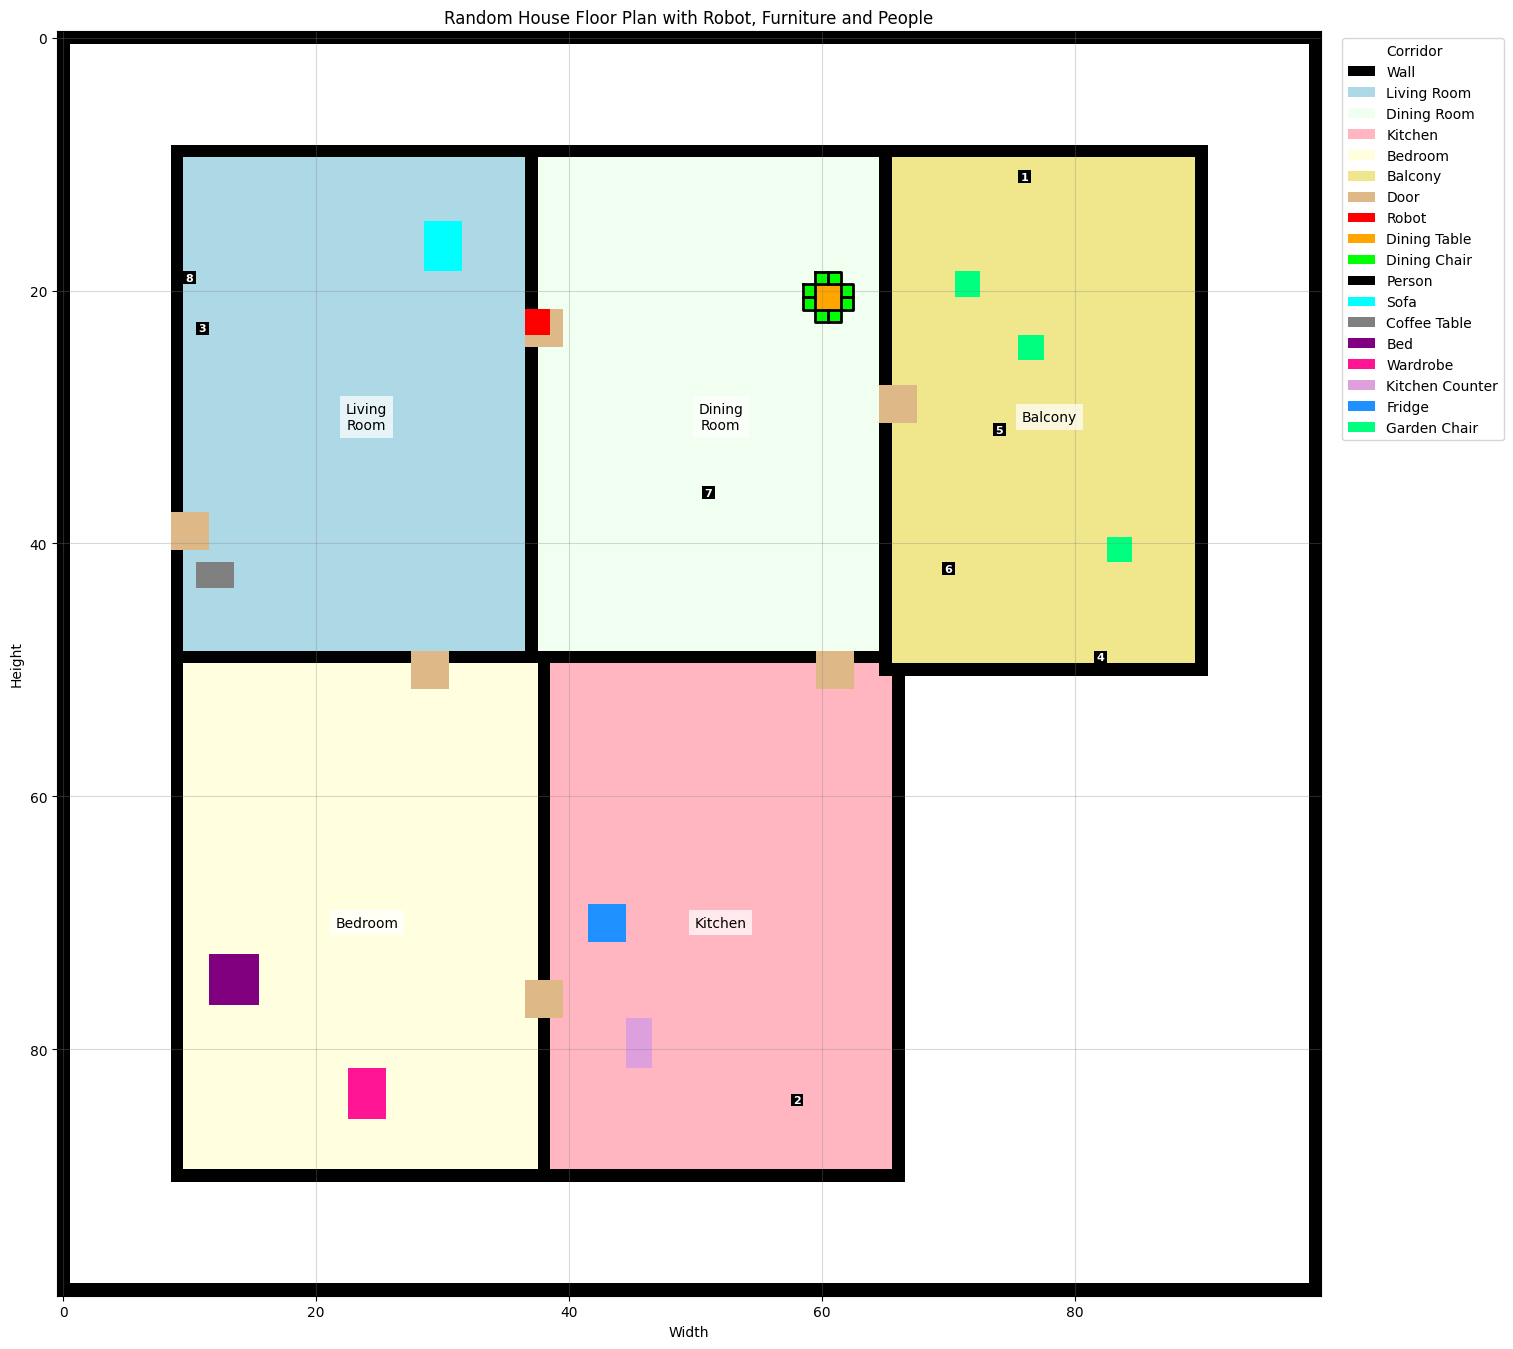

In [3]:
from utils.home_layout import generate_house_layout

grid, rooms = generate_house_layout(file_name = 'home.txt')

In [4]:
# YOUR CODE HERE
import numpy as np
# Read the Layout from the txt file
def read_layout(file_path='home.txt'):
    file_path = file_path
    home = []
    with open(file_path, 'r') as file:

        for line in file:
            row = line.strip().split(' ')
            home.append(row)
    home = np.array(home)
    return home
home=read_layout()
print(home)
# raise NotImplementedError()

[['W' 'W' 'W' ... 'W' 'W' 'W']
 ['W' '.' '.' ... '.' '.' 'W']
 ['W' '.' '.' ... '.' '.' 'W']
 ...
 ['W' '.' '.' ... '.' '.' 'W']
 ['W' '.' '.' ... '.' '.' 'W']
 ['W' 'W' 'W' ... 'W' 'W' 'W']]


## Task 1.2

**[20 Point(s)]**

## Task 2: Topological Mapping (20 points)

The robot needs to navigate through a large house environment to guide people to their seats. Planning paths directly on this grid is inefficient. Your task is to create a topological graph that represents the house layout at a higher level of abstraction, enabling hierarchical path planning.

#### Why does it matter? 
A topological map reduces the problem by first planning through rooms, then detailed paths.This hierarchical approach significantly reduces the search space and planning time.



To do so, you can utilise [networkx](https://networkx.org/) for creating graphs.
Below is an example showing how to create and visualize a graph with networkx. Feel free to implement your own approach - this is just an illustration and not meant to dictate your solution.


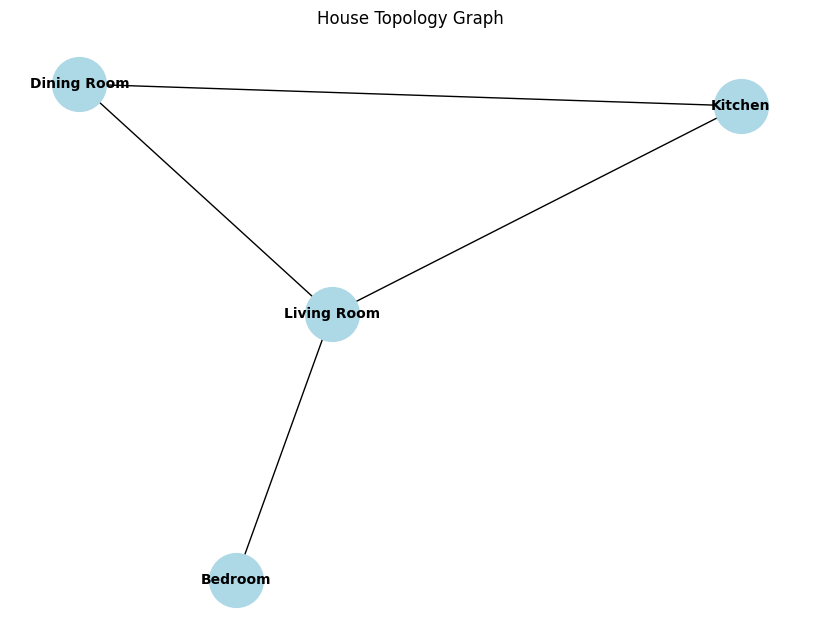

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# Create a new graph
G = nx.Graph()

# Add nodes (rooms)
G.add_node("Living Room")
G.add_node("Kitchen") 
G.add_node("Bedroom")
G.add_node("Dining Room")

# Add edges (doors/connections between rooms)
G.add_edge("Living Room", "Kitchen")
G.add_edge("Living Room", "Dining Room")
G.add_edge("Kitchen", "Dining Room") 
G.add_edge("Living Room", "Bedroom")

# Draw the graph
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1500, font_size=10, font_weight='bold')
plt.title("House Topology Graph")
plt.show()


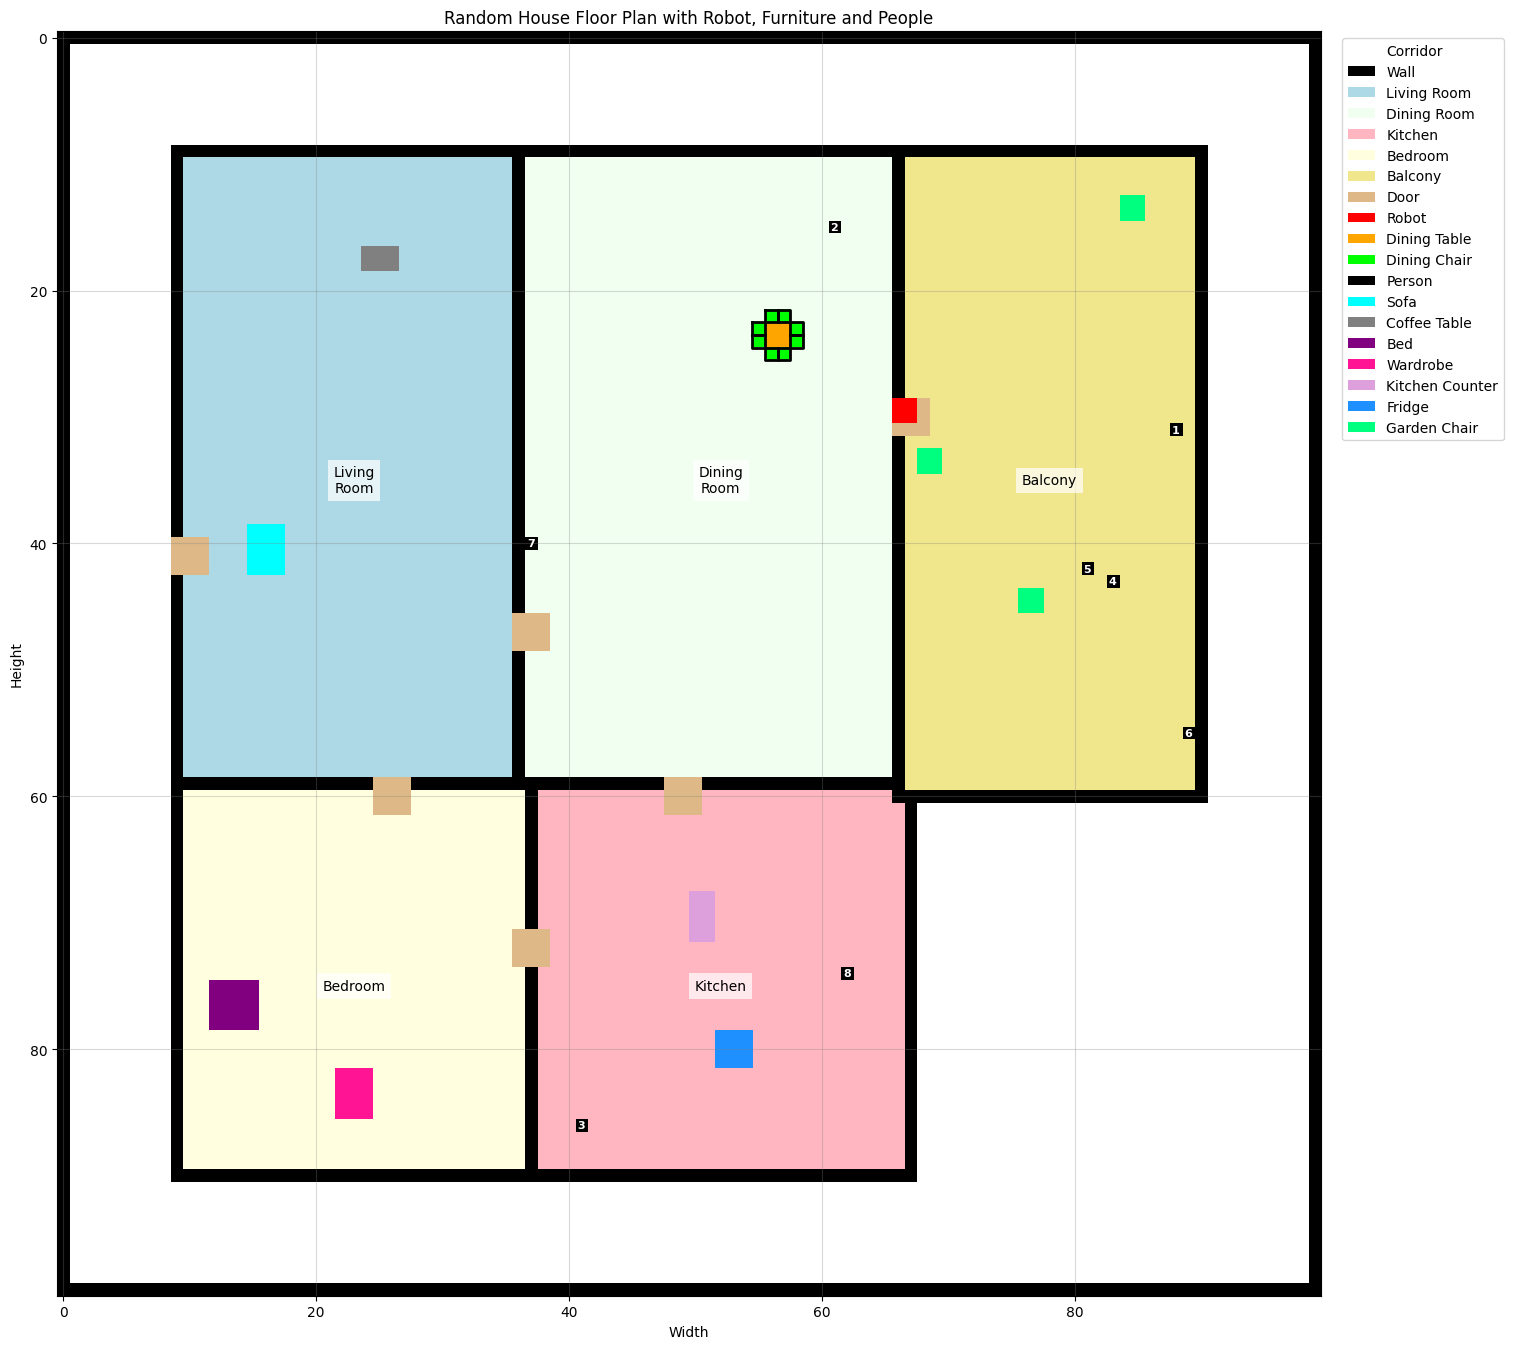

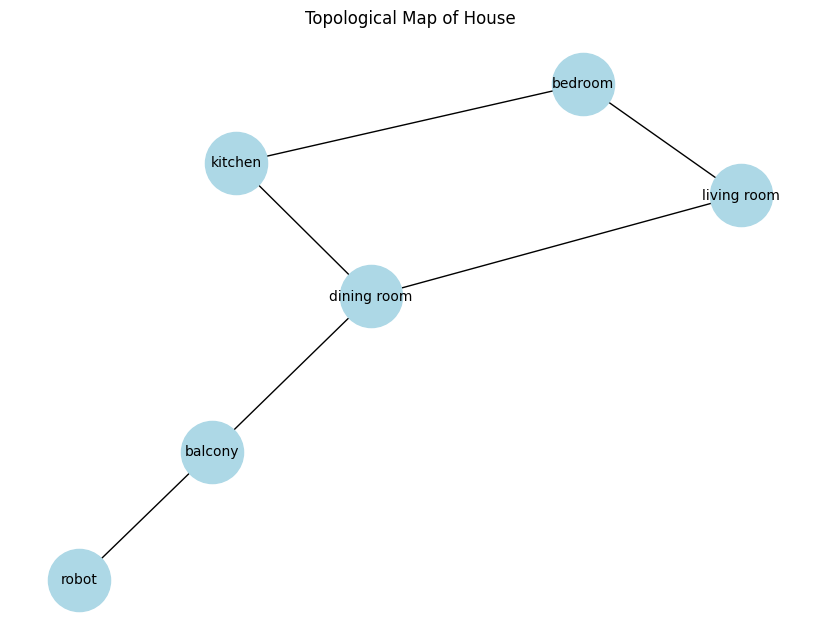

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


class HouseTopology:
    def __init__(self, layout_file, grid, rooms):
        self.layout_file = layout_file
        self.grid = grid
        self.rooms = rooms
        self.rooms_dict = self.slice_rooms()
        self.graph = nx.Graph()
        self.robot_room = None
        self.label_map = {
                        "L": "living room",
                        "D": "dining room",
                        "K": "kitchen",
                        "B": "bedroom",
                        "C": "balcony",
                        "r": "robot"
                    }
    def read_layout(self):
        home = []
        with open(self.layout_file, 'r') as file:
            for line in file:
                row = line.strip().split(' ')
                home.append(row)
        self.grid = np.array(home)
        return self.grid

    def slice_rooms(self):
        rooms_dict = {}
        for room_type, (row_slice, col_slice) in self.rooms.items():
            slices = []
            for y in range(row_slice.start, row_slice.stop):
                for x in range(col_slice.start, col_slice.stop):
                    slices.append((y, x))
            rooms_dict[room_type] = slices
        return rooms_dict

    def get_room_of_position(self, position):
        for room, positions in self.rooms_dict.items():
            if position in positions:
                return room
        return None

    def topology_graph(self):
        graph_edges = set()
        robot_room = None

        directions = [((0, -2), (0, 2)), ((-2, 0), (2, 0))]  # horizontal and vertical opposites

        for x in range(self.grid.shape[0]):
            for y in range(self.grid.shape[1]):
                if self.grid[x][y] == 'd':
                    for (dx1, dy1), (dx2, dy2) in directions:
                        p1 = (x + dx1, y + dy1)
                        p2 = (x + dx2, y + dy2)

                        room1 = self.get_room_of_position(p1)
                        room2 = self.get_room_of_position(p2)

                        if room1 and room2 and room1 != room2:
                            graph_edges.add(tuple(sorted((room1, room2))))

                elif self.grid[x][y] == 'r':
                    for dx, dy in [(0, -2), (0, 2), (-2, 0), (2, 0)]:
                        mx, my = x + dx, y + dy
                        room = self.get_room_of_position((mx, my))
                        if room:
                            robot_room = room

        self.robot_room = robot_room
        self.graph.add_node("r")
        
        
        self.graph.add_nodes_from(self.rooms_dict.keys())
        self.graph.add_edges_from(graph_edges)
        if robot_room:
            self.graph.add_edge("r", robot_room)


    def plot_graph(self):
        display_labels = {
        node: self.label_map.get(node, node) for node in self.graph.nodes
            }
        plt.figure(figsize=(8, 6))
        nx.draw(self.graph, with_labels=True,labels=display_labels, node_size=2000,
                node_color="lightblue", font_size=10)
        plt.title("Topological Map of House")
        plt.show()

        
# from home_layout import generate_house_layout
from utils.home_layout import generate_house_layout

# grid, rooms = generate_house_layout(file_name = 'home.txt')
grid, rooms = generate_house_layout("home.txt")
house = HouseTopology("home.txt", grid, rooms)
house.topology_graph()
house.plot_graph()


## Task 1.3

**[30 Point(s)]**

## Task 3: Path Planning (30 points)

The robot needs to guide multiple people to their assigned seats at the dining table. For each person, the robot must:

1. Plan a path from the robot's current position to the person
2. Plan a path from the person to their assigned seat
3. Implement A* search algorithm for path planning
4. Handle obstacles (furniture, walls) and other people as blocked cells

To do so, you need to **implement A\* search with appropriate heuristic function**, make sure to account for walls, furniture and other people as obstacles.

**Calculate and print total path cost for the complete guidance task**.

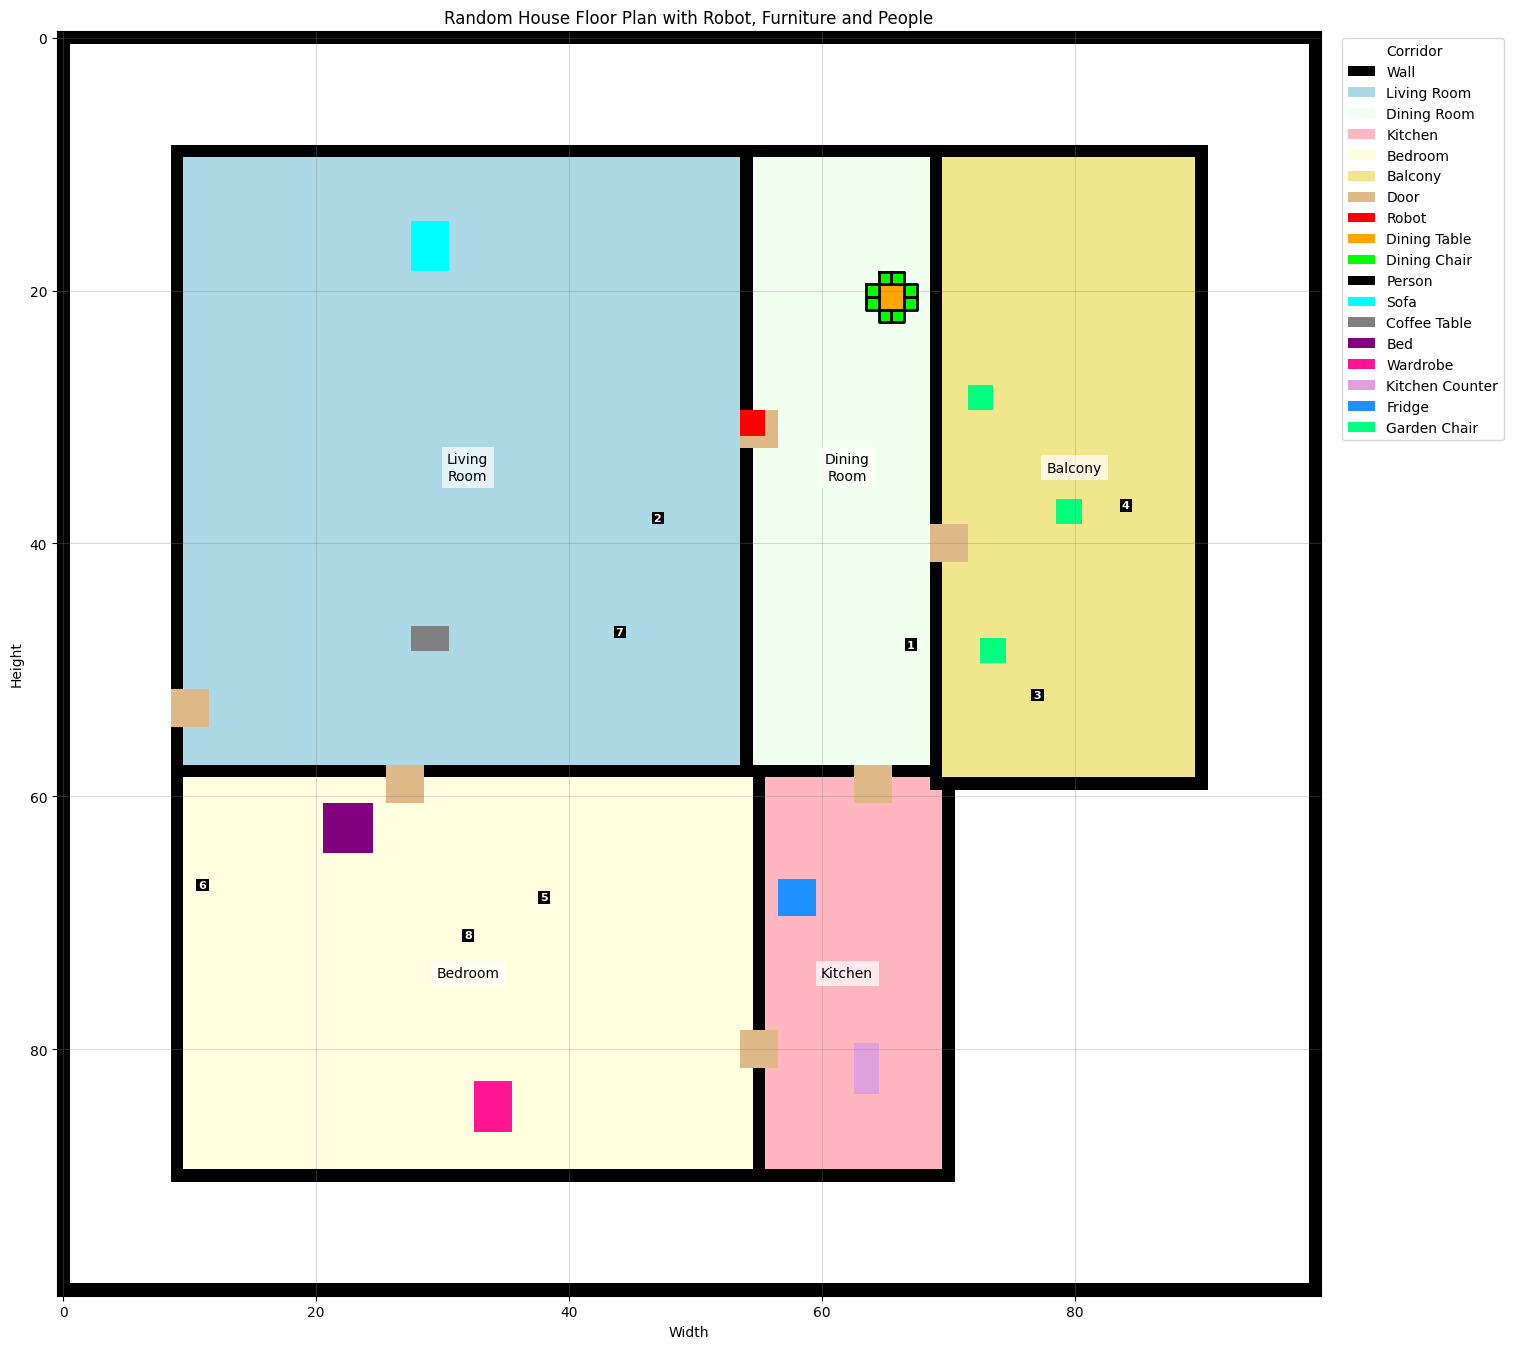

Chairs dict: {'H1': (21, 64), 'H2': (20, 64), 'H3': (22, 66), 'H4': (22, 65), 'H5': (20, 67), 'H6': (21, 67), 'H7': (19, 65), 'H8': (19, 66)}
For person 2, path to person length: 16
Delivered person 2 to H1 with total cost: 50
For person 7, path to person length: 46
Delivered person 7 to H4 with total cost: 92
For person 1, path to person length: 28
Delivered person 1 to H3 with total cost: 59
For person 4, path to person length: 37
Delivered person 4 to H6 with total cost: 74
For person 3, path to person length: 41
Delivered person 3 to H5 with total cost: 85
For person 5, path to person length: 99
Delivered person 5 to H2 with total cost: 195
For person 8, path to person length: 93
Delivered person 8 to H7 with total cost: 192
For person 6, path to person length: 104
Delivered person 6 to H8 with total cost: 209

Total operation cost: 956
Total cost: 956


In [7]:
# YOUR CODE HERE
import numpy as np
import heapq
import string
from utils.home_layout import generate_house_layout
import math


class A_star_people_placement:
    def __init__(self, filepath):
        """
        Function used to process the grid, specify robot position, people position, and chair position
        Also we are defining the static obstacles here which is nothing but the predefined 
        obstacles that are present on the map and defined in the legend provided
        This is static because we have also other obstacles like other people, but this list changes
        dynamically.
        """
        self.grid = self.read_and_load_grid(filepath)
        self.row, self.column = self.grid.shape
        self.robot_pos = self.get_robot_pos()
        self.people_pos = self.get_people_pos()
        self.chair_pos = self.get_chair_pos()
        self.static_obstacles = {'W', 'A', 'F', 'k', 'G', 'T', 'S', 'c', 'b'}

    def read_and_load_grid(self, filepath):
        """
        Function to load the grid from text file as a numpy array
        Grid would be a 2D numpy array
        """
        with open(filepath, 'r') as r:
            lines = r.read().splitlines()
        return np.array([line.split() for line in lines])

    def get_robot_pos(self):
        """
        Just running through the grid and performing the character matching to see if we found the robot
        Once robot is found we return the tuple containing position of robot
        """
        for i in range(self.row - 1):
            for j in range(self.column - 1):
                if self.grid[i][j] == 'r' and self.grid[i][j + 1] == 'r' and \
                   self.grid[i + 1][j] == 'r' and self.grid[i + 1][j + 1] == 'r':
                    return (i, j)

    def get_people_pos(self):
        """
        Similar to above function run through grid match for digits and return the people co-ordinates
        """
        people = {}
        for i in range(self.row):
            for j in range(self.column):
                if self.grid[i][j] in string.digits:
                    people[self.grid[i][j]] = (i, j)
        return people

    def get_chair_pos(self):
        """
        Simialr to above function just run through the grid and return the 
        co-ordinates of chairs
        Here we are storing the co-ordinates of the chair into a dictionary based on where it is in the grid
        top-left is H1, top right is H2 and so on.... in clockwise direction
        """
        chair_positions = []
        chairs = {}
        for i in range(self.row):
            for j in range(self.column):
                if self.grid[i][j] == 'H':
                    chair_positions.append((i, j))

        min_row = min(pos[0] for pos in chair_positions)
        max_row = max(pos[0] for pos in chair_positions)
        min_col = min(pos[1] for pos in chair_positions)
        max_col = max(pos[1] for pos in chair_positions)

        top = sorted([pos for pos in chair_positions if pos[0] == min_row], key=lambda x: x[1])
        bottom = sorted([pos for pos in chair_positions if pos[0] == max_row], key=lambda x: x[1], reverse=True)
        left = sorted([pos for pos in chair_positions if pos[1] == min_col and pos not in top + bottom], key=lambda x: x[0], reverse=True)
        right = sorted([pos for pos in chair_positions if pos[1] == max_col and pos not in top + bottom], key=lambda x: x[0])

        final_order = left + bottom + right + top
        chair_labels = [f'H{i+1}' for i in range(8)]

        for i in range(len(chair_labels)):
            chairs[chair_labels[i]] = final_order[i]

        print(f"Chairs dict: {chairs}")
        return chairs

    def check_if_position_valid(self, row, column, blocked):
        """
        Check at any given location if robot which is 2x2 can move into it.
        """
        if row < 0 or column < 0 or row + 1 >= self.row or column + 1 >= self.column:
            return False
        for rw in range(2):
            for cl in range(2):
                sub_grid = self.grid[row + rw][column + cl]
                if sub_grid in blocked or (row + rw, column + cl) in blocked:
                    return False
        return True

    def get_next_cell(self, pos, blocked):
        """
        Considering 2x2 size of robot return valid A* cell assignment
        """
        row, column = pos
        directions = [(1, 0), (-1, 0), (0, -1), (0, 1)]
        neighbour = []
        for rw, cl in directions:
            new_rw = row + rw
            new_cl = column + cl
            if self.check_if_position_valid(new_rw, new_cl, blocked):
                neighbour.append((new_rw, new_cl))
        return neighbour

    def heuristic(self, a, b):
        """
        Using manhattan distance here as a heuristic so limiting diagonal movements
        """
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def apply_astar(self, start, goal, blocked):
        """
        Applying A* algo here using f-score and g-scores

        """
        open_set = []
        heapq.heappush(open_set, (0 + self.heuristic(start, goal), 0, start))
        came_from = {}
        g_score = {start: 0}

        while open_set:
            _, cost, current = heapq.heappop(open_set)
            if current == goal:
                return self.reconstruct_path(came_from, current)

            for neighbor in self.get_next_cell(current, blocked):
                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f = tentative_g + self.heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f, tentative_g, neighbor))

        return None

    def reconstruct_path(self, came_from, current):
        """
        Backtracking through A* path to get the full path
        """
        path = [current]
        while current in came_from:
            current = came_from[current]
            path.append(current)
        path.reverse()
        return path

    def get_adjacent_valid_positions(self, chair, blocked):
        """
        Here we are checking for adjacent cells of chair because H is a 1x1 while
        robot is a 2x2, so stopping next to the chair and dropping of the persons
        """
        r, c = chair
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        positions = []
        for dr, dc in directions:
            top_left = (r + dr, c + dc)
            if self.check_if_position_valid(top_left[0], top_left[1], blocked):
                positions.append(top_left)
        return positions

    def find_best_assignments(self):
        """
        Standalone function uses greedy search to assign the chairs to people
        Here using A* to find closest person to robot at start, then to closest goal
        And this process repeats until we have the costs of each person to each goal and
        then we choose the least cost ones at the end.
        """
        robot = self.robot_pos
        assignments = {}
        temp_people = self.people_pos.copy()
        temp_chairs = self.chair_pos.copy()

        while temp_people:
            best_person = None
            best_chair = None
            best_path_len = float('inf')

            for pid, p_pos in temp_people.items():
                blocked = self.static_obstacles.union({p for p in string.digits if p != pid})
                blocked_positions = {loc for pid2, loc in temp_people.items() if pid2 != pid}
                path_to_person = self.apply_astar(robot, p_pos, blocked.union(blocked_positions))

                if not path_to_person:
                    continue

                for label, chair in temp_chairs.items():
                    blocked = self.static_obstacles.union(set(temp_people.values())) - {'H'}
                    adjacent_positions = self.get_adjacent_valid_positions(chair, blocked)
                    for adj_pos in adjacent_positions:
                        path_to_chair = self.apply_astar(p_pos, adj_pos, blocked)
                        if path_to_chair:
                            total_len = len(path_to_person) + len(path_to_chair)
                            if total_len < best_path_len:
                                best_path_len = total_len
                                best_person = pid
                                best_chair = label

            if not best_person or not best_chair:
                print("No more valid assignments can be made.")
                break

            assignments[best_person] = best_chair
            del temp_people[best_person]
            del temp_chairs[best_chair]
            robot = self.people_pos[best_person]

        return assignments

    def seat_people_a_star(self, assignment_dict):
        """
        Helper function to apply a-star to seat people finally once assignments are done
        This function returns cost to deliver each person to the seat and finally the total cost
        """
        robot = self.robot_pos
        temp_people = self.people_pos.copy()
        total_cost = 0
        total_path=[]

        for pid, chair_label in assignment_dict.items():
            if pid not in temp_people:
                print(f"Skipping person {pid}: already seated or missing.")
                continue

            person_pos = temp_people[pid]
            chair_pos = self.chair_pos[chair_label]

            other_people = {v for k, v in temp_people.items() if k != pid}
            blocked = self.static_obstacles.union(other_people)

            path_to_person = self.apply_astar(robot, person_pos, blocked)
            if not path_to_person:
                print(f"Failed to reach person {pid} at {person_pos}")
                continue

            robot = path_to_person[-1]
            total_cost += len(path_to_person)
            print(f"For person {pid}, path to person length: {len(path_to_person)}")
            
            total_path.append(path_to_person)
            
            min_len = float('inf')
            best_chair_path = None
            blocked_chair = self.static_obstacles.union(set(temp_people.values()))

            for adj in self.get_adjacent_valid_positions(chair_pos, blocked_chair):
                path = self.apply_astar(robot, adj, blocked_chair)
                if path and len(path) < min_len:
                    best_chair_path = path
                    min_len = len(path)

            if not best_chair_path:
                print(f"Failed to deliver person {pid} to chair {chair_label}")
                continue

            robot = best_chair_path[-1]
            total_cost += len(best_chair_path)
            print(f"Delivered person {pid} to {chair_label} with total cost: {len(path_to_person) + len(best_chair_path)}")
            total_path.append(best_chair_path)

            # Update the cell so that cell is traversable
            chair_r, chair_c = self.chair_pos[chair_label]
            self.grid[chair_r][chair_c] = '0'

            del temp_people[pid]

        print(f"\nTotal operation cost: {total_cost}")
        return total_cost ,total_path


if __name__ == '__main__':
    grid, rooms = generate_house_layout(file_name='home.txt')
    planner = A_star_people_placement('home.txt')
    assignments = planner.find_best_assignments()
    total_cost,total_path = planner.seat_people_a_star(assignments)
    print("Total cost:", total_cost)

# raise NotImplementedError()

## Task 1.4

**[40 Point(s)]**

## Task 4: Seating Arrangement Constraint Satisfaction (30 points)

The robot needs to determine valid seating arrangements for 8 people around the dining table while respecting social constraints. Each arrangement must satisfy basic constraints (one person per seat) and specific social preferences of individuals.



### Social Constraints:
1. Language Groups:
   - P1, P2, P3 speak English only
   - P4, P5 speak Spanish only
   - P6, P7, P8 are bilingual
   - At least one bilingual person must sit between language groups
   
2. Conversation Preferences:
   - P1 wants to discuss business with P6 and needs to sit together
   - P3 and P5 are in a heated argument so must be far apart at the table
   - P2 and P8 are close friends so want to sit together
   - P4 and P7 are sharing a presentation so need to sit adjacent


**Implement a constraint satisfaction solver to find valid seating arrangements, please use backtracking search to find all possible valid arrangements.**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import copy

from collections import defaultdict, Counter
from functools import reduce
from operator import eq, neg





filepath = 'home.txt'


# print(rooms.items())
# Slice the rooms


rooms_dict = {}

for room_type, (row_slice, col_slice) in rooms.items():
    slices = []

    for y in range(row_slice.start, row_slice.stop):
        for x in range(col_slice.start, col_slice.stop):

            slices.append((y, x))
    # Assign the slices of matrix to each key room_type as dictionary in rooms_slice
    rooms_dict[room_type] = slices

# TODO: One possible options to implement CSP for social robotics

# Uses MRV to choose the variable.

# Assigns a value.

# Uses inference forward checking to prune domains.

# Do Backtrack search.

# Repeat


#  CLass of the main CSP solver

# table arrangement

#    s8 s7
#  s1     s6
#  s2     s5
#    s3 s4


class SeatingCSP():
    def __init__(self, filepath):
        # Variables of the problem are people.
        self.people = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']

        # All people need to be assigned each seat. So the domain will be the number of seats.
        # We will assume the seats are numbered as s1 .... s8 starting from first left seat in counter clockwise.
        self.seats = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8']

        # Domain will be a dict where keys will be person and values will be all 8 seats initially.
        self.domains = {person: self.seats.copy() for person in self.people}

        # fix P1 to seat s1 to iniiate the assignment.
        self.domains['P1'] = ['s1']

        # Constraints from the porblem can be defined as either 2 persons will sit adjacent or far apart.
        # Making a binary constraint for this purpose.
        self.constraints = {
            'P1': [('P6', self.should_be_adjacent)],
            'P3': [('P5', self.should_be_far)],
            'P2': [('P8', self.should_be_adjacent)],
            'P4': [('P7', self.should_be_adjacent)],
            'P6': [('P1', self.should_be_adjacent)],
            'P8': [('P2', self.should_be_adjacent)],
            'P5': [('P3', self.should_be_far)],
            'P7': [('P4', self.should_be_adjacent)],
        }

        self.grid = self.read_layout(filepath)
        self.row, self.column = self.grid.shape

    # Read the Layout from the txt file

    def read_layout(self, file_path='home.txt'):
        file_path = file_path
        home = []
        with open(file_path, 'r') as file:

            for line in file:
                row = line.strip().split(' ')
                home.append(row)
        home = np.array(home)
        return home

    def should_be_adjacent(self, seat1, seat2):
        idx1 = self.seats.index(seat1)
        idx2 = self.seats.index(seat2)
        distance = abs(idx1 - idx2)
        return distance == 1 or distance == 7

    def should_be_far(self, seat1, seat2):
        idx1 = self.seats.index(seat1)
        idx2 = self.seats.index(seat2)
        distance = min(abs(idx1 - idx2), 8 - abs(idx1 - idx2))
        return distance >= 3

    def is_consistent(self, person, seat, assignment):

        if seat in assignment.values():
            return False

        # Check binary constraints with already assigned people
        if person in self.constraints:
            for other_person, constraint in self.constraints[person]:
                if other_person in assignment:
                    other_seat = assignment[other_person]
                    if not constraint(seat, other_seat):
                        return False

        return True  # No conflicts

    # Minimum Remaining Values (MRV) chooses the next unassigned variable

    def select_unassigned_variable(self, assignment):
        # Maintian un assigned list
        unassigned = []

        for p in self.people:
            if p not in assignment:
                unassigned.append(p)

        # Choose the person with the fewest seat options
        select_person = None
        min_domain_size = float('inf')

        for person in unassigned:
            domain_size = len(self.domains[person])
            if domain_size < min_domain_size:
                min_domain_size = domain_size
                select_person = person

        return select_person

    # Implement forward checking to prune the tree
    def forward_check(self, person, seat, assignment, domains):
        new_domains = copy.deepcopy(domains)

        if person in self.constraints:
            for neighbor, constraint in self.constraints[person]:
                if neighbor not in assignment:
                    valid_seats = []
                    for neighbor_seat in new_domains[neighbor]:
                        if constraint(seat, neighbor_seat):
                            valid_seats.append(neighbor_seat)
                    if not valid_seats:
                        return None
                    new_domains[neighbor] = valid_seats
        return new_domains

    def backtrack(self, assignment, domains) -> list:
        # initializing the assingment dict
        # assignment = {}
        # Check for goal state
        if len(assignment) == len(self.people):
            return [assignment.copy()]
        # Choose variable (person) using MRV
        person = self.select_unassigned_variable(assignment)

        # Empty list to store all possible solutions later.
        all_solutions = []
        available_seats = list(self.domains[person])

        # For each seat in their domain:
        for seat in available_seats:

            # Check consistency
            if self.is_consistent(person, seat, assignment):

                # Assign a seat
                assignment[person] = seat
                # We could do Forward checking here but skipping at the moment
                # TODO: implement forward checking to prune the tree.
                # Forward checking
                new_domains = self.forward_check(
                    person, seat, assignment, domains)

                #  Recursively do the backtracking until it exits the loop.
                # solutions = self.backtrack(assignment)
                # all_solutions.extend(solutions)

                if new_domains is not None:
                    #  Recursively do the backtracking until it exits the loop.
                    solutions = self.backtrack(assignment, new_domains)
                    # If successful then append the result into the list of dict
                    all_solutions.extend(solutions)

                # Else undo the assingment if needed. It's the ultimate purpose of backtracking search
                del assignment[person]

        # If successful then return the result
        return all_solutions

    def solve(self):
        solutions = self.backtrack({}, copy.deepcopy(self.domains))
        return solutions

    def get_chair_pos(self):
        # We store the position of chairs as a list.
        chairs = {}
        count = 1
        for i in range(self.row):
            for j in range(self.column):
                if self.grid[i][j] == 'H':
                    label = f'H{count}'
                    chairs[label] = (i, j)
                    count += 1
        print(f"Found {len(chairs)} chairs:", chairs)
        return chairs

    def select_solution(self):
        solutions = self.solve()

        # choosing the 2nd solution which is aligning with all the constraints
        solution = solutions[1]
        print(f"Solution No 2: {solution}")

        chairs = self.get_chair_pos()
        # print(f"Chair positions : {chairs}")

        # Map the people with position of chairs
        map_person_chair_pos = {}
        map_person_chair = {}

        # Mapping seat labels 's1' to 's8' to corresponding 'H1' to 'H8'
        seat_to_chair = {f's{i+1}': pos for i,
                         pos in enumerate(chairs.keys())}

        # mapping the position of the chairs as tuples.
        for person, seat in solution.items():
            map_person_chair_pos[person] = seat_to_chair[seat]

        # mapping the position of the chairs as H1...H8
        for person, seat in solution.items():
            map_person_chair[person.lstrip('P')] = seat_to_chair[seat]
        print(f"map person to chair position: {map_person_chair_pos}")
        print(f"map person to chair position: {map_person_chair}")

        return map_person_chair

    def print(self):
        # print(f"DOMAINS : {self.domains}")
        print("All possible solutions")


############################################
# Usage
if __name__ == "__main__":
    filepath = 'home.txt'

    csp = SeatingCSP('home.txt')
    solutions = csp.solve()

    print(f"Total solutions found: {len(solutions)}\n")
    for i, sol in enumerate(solutions, 1):
        print(f"Solution No {i}: {sol}")

    solution = csp.select_solution()


'''

Language Groups:

P1, P2, P3 speak English only
P4, P5 speak Spanish only
P6, P7, P8 are bilingual
At least one bilingual person must sit between language groups

Conversation Preferences:

P1 wants to discuss business with P6 and needs to sit together
P3 and P5 are in a heated argument so must be far apart at the table
P2 and P8 are close friends so want to sit together
P4 and P7 are sharing a presentation so need to sit adjacent

'''
# Solution [0] = P1, P2, P8, P3, P4, P7, P5, P6
# Solution [1] = P1, P2, P8, P3, P7, P4, P5, P6
# Solution No 2: {'P1': 's1', 'P2': 's2', 'P3': 's4', 'P4': 's6', 'P5': 's7', 'P6': 's8', 'P7': 's5', 'P8': 's3'} -- we can select this.


Total solutions found: 96

Solution No 1: {'P1': 's1', 'P2': 's2', 'P3': 's4', 'P4': 's5', 'P5': 's7', 'P6': 's8', 'P7': 's6', 'P8': 's3'}
Solution No 2: {'P1': 's1', 'P2': 's2', 'P3': 's4', 'P4': 's6', 'P5': 's7', 'P6': 's8', 'P7': 's5', 'P8': 's3'}
Solution No 3: {'P1': 's1', 'P2': 's2', 'P3': 's7', 'P4': 's5', 'P5': 's4', 'P6': 's8', 'P7': 's6', 'P8': 's3'}
Solution No 4: {'P1': 's1', 'P2': 's2', 'P3': 's7', 'P4': 's6', 'P5': 's4', 'P6': 's8', 'P7': 's5', 'P8': 's3'}
Solution No 5: {'P1': 's1', 'P2': 's3', 'P3': 's2', 'P4': 's5', 'P5': 's7', 'P6': 's8', 'P7': 's6', 'P8': 's4'}
Solution No 6: {'P1': 's1', 'P2': 's3', 'P3': 's2', 'P4': 's6', 'P5': 's5', 'P6': 's8', 'P7': 's7', 'P8': 's4'}
Solution No 7: {'P1': 's1', 'P2': 's3', 'P3': 's2', 'P4': 's6', 'P5': 's7', 'P6': 's8', 'P7': 's5', 'P8': 's4'}
Solution No 8: {'P1': 's1', 'P2': 's3', 'P3': 's2', 'P4': 's7', 'P5': 's5', 'P6': 's8', 'P7': 's6', 'P8': 's4'}
Solution No 9: {'P1': 's1', 'P2': 's3', 'P3': 's4', 'P4': 's5', 'P5': 's7', '

'\n\nLanguage Groups:\n\nP1, P2, P3 speak English only\nP4, P5 speak Spanish only\nP6, P7, P8 are bilingual\nAt least one bilingual person must sit between language groups\n\nConversation Preferences:\n\nP1 wants to discuss business with P6 and needs to sit together\nP3 and P5 are in a heated argument so must be far apart at the table\nP2 and P8 are close friends so want to sit together\nP4 and P7 are sharing a presentation so need to sit adjacent\n\n'

## Task 1.5

**[20 Point(s)]**

## Task 5: Integration (10 points)

The final task is to integrate all the previous components into a complete solution that demonstrates the robot's ability to efficiently guide guests to their seats while respecting both physical constraints of the environment and social seating preferences.

**Implement the following:**
- Apply the seating arrangement solution from the constraint satisfaction solver to find the valid seating arrangement
- Then use the topological map to find the local map for each guest
- Then use the A* search algorithm on the local map to find the path from the robot to each guest and from each guest to their assigned seat
- Show the total cost of the path taken by the robot and display the seating arrangment.

In [9]:
# from seating_csp import SeatingCSP
from collections import deque
# from robo_placement_class import A_star_people_placement

'''
Choose valid assignment to move forward from CSP.

Map seat labels to physical locations in the grid,

Find each guest’s starting position and move robot to that position with A*

Use A* to guide each one to their assigned seat.

'''
# {P1 : (x,y), P2: (x,y)...} this is how we return the assingment from CSP as a dict


# Integration of Seating CSP + A* + Topological Map
if __name__ == "__main__":
    filepath = 'home.txt'

    # Use CSP class to get one assignment
    csp = SeatingCSP(filepath)

    # Directly get the solution with mapped tuples of position of chairs to each person. Returns a dict
    map_person_chair = csp.select_solution()

    # Use A star class to do path planning
    a_star = A_star_people_placement(filepath)
    a_star.seat_people_a_star(map_person_chair)


# TODO: Print topological map as below example


Solution No 2: {'P1': 's1', 'P2': 's2', 'P3': 's4', 'P4': 's6', 'P5': 's7', 'P6': 's8', 'P7': 's5', 'P8': 's3'}
Found 8 chairs: {'H1': (19, 65), 'H2': (19, 66), 'H3': (20, 64), 'H4': (20, 67), 'H5': (21, 64), 'H6': (21, 67), 'H7': (22, 65), 'H8': (22, 66)}
map person to chair position: {'P1': 'H1', 'P2': 'H2', 'P3': 'H4', 'P4': 'H6', 'P5': 'H7', 'P6': 'H8', 'P7': 'H5', 'P8': 'H3'}
map person to chair position: {'1': 'H1', '2': 'H2', '3': 'H4', '4': 'H6', '5': 'H7', '6': 'H8', '7': 'H5', '8': 'H3'}
Chairs dict: {'H1': (21, 64), 'H2': (20, 64), 'H3': (22, 66), 'H4': (22, 65), 'H5': (20, 67), 'H6': (21, 67), 'H7': (19, 65), 'H8': (19, 66)}
For person 1, path to person length: 32
Delivered person 1 to H1 with total cost: 64
For person 2, path to person length: 34
Delivered person 2 to H2 with total cost: 69
For person 3, path to person length: 47
Delivered person 3 to H4 with total cost: 91
For person 4, path to person length: 38
Delivered person 4 to H6 with total cost: 75
For person 5, p

## Task 1.6

**[10 Point(s)]**

## Task 6: Visualisation: Optional (10 points)

Let's visualise the path for each person using the provided animation code. Ensure that the path format matches the requirements of the function. You can either use the given animation code or create your own visualization to demonstrate the robot's path.

In [10]:
from utils.robot_path_vis import animate_robot_movement
from IPython.display import HTML
import matplotlib.pyplot as plt

def demonstrate_robot_guidance(grid, rooms,path):
    """
    Demonstrates robot guidance by creating an animation of the robot's path.

    Args:
        grid: 2D array representing the house layout.
        rooms: Dictionary containing room areas.
        path: List of (x, y) tuples

    The path should be a list of (x, y) tuples representing the coordinates
    the robot will follow. The path should start at the robot's initial position,
    include the position of the person to guide, and end at the destination.

    """
    
    # Placeholder for A* algorithm call to generate path
    filepath = 'home.txt'

    
    # Use A star class to do path planning
    a_star = A_star_people_placement(filepath)
    a_star.seat_people_a_star(map_person_chair)
    total_cost,total_path = planner.seat_people_a_star(map_person_chair)
    # YOUR CODE HERE
#     raise NotImplementedError()
    
    # Create animation
    anim = animate_robot_movement(grid, rooms, total_path, person_following=True)
    return anim

# Run demonstration

anim = demonstrate_robot_guidance(grid, rooms,total_path)

HTML(anim.to_jshtml())



Chairs dict: {'H1': (21, 64), 'H2': (20, 64), 'H3': (22, 66), 'H4': (22, 65), 'H5': (20, 67), 'H6': (21, 67), 'H7': (19, 65), 'H8': (19, 66)}
For person 1, path to person length: 32
Delivered person 1 to H1 with total cost: 64
For person 2, path to person length: 34
Delivered person 2 to H2 with total cost: 69
For person 3, path to person length: 47
Delivered person 3 to H4 with total cost: 91
For person 4, path to person length: 38
Delivered person 4 to H6 with total cost: 75
For person 5, path to person length: 98
Delivered person 5 to H7 with total cost: 198
For person 6, path to person length: 104
Delivered person 6 to H8 with total cost: 209
For person 7, path to person length: 52
Delivered person 7 to H5 with total cost: 102
For person 8, path to person length: 96
Delivered person 8 to H3 with total cost: 191

Total operation cost: 999
For person 1, path to person length: 32
Delivered person 1 to H1 with total cost: 64
For person 2, path to person length: 34
Delivered person 2 to